In [11]:
import os


training_data= os.listdir("train")[:20000]
print(len(training_data))




10000


In [12]:
labels = []

for x in training_data:
    if  'cat' in x :
        labels.append(0)
    elif 'dog' in x :
        labels.append(1)
print(labels)


[1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 

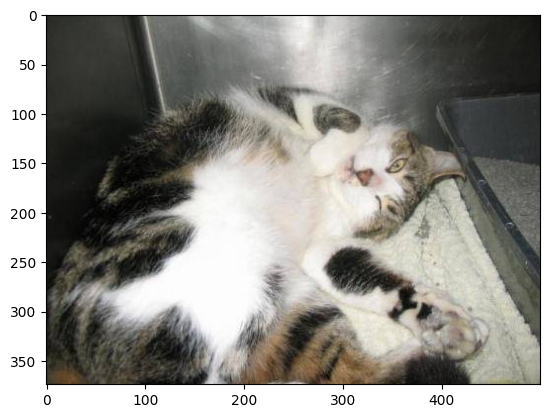

In [13]:
import matplotlib.pyplot as plt 
import matplotlib.image as img

cat_image = img.imread("train/cat.10126.jpg")
plt.imshow(cat_image)


In [14]:
#import PIL
#for file_name in training_data:
  #  img = PIL.Image.open('train/' +file_name)
 #   img = img.resize((224,224))
 #   img = img.convert('RGB')
 #   img.save('resized/' + file_name)

In [15]:
import cv2
import numpy as np

cat_dog_images=[]
for file_name in training_data:
    img = cv2.imread('resized/'+ file_name)

    cat_dog_images.append(img)

cat_dog_images = np.asarray(cat_dog_images)


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature 

In [16]:
from sklearn.model_selection import train_test_split
labels = np.asarray(labels)
x_train, x_test, y_train, y_test = train_test_split(cat_dog_images, labels, test_size=0.2, random_state=2)

x_train_scaled = x_train /255
x_test_scaled = x_test/255

In [17]:
import tensorflow as tf
import tensorflow_hub as hub


mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [18]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [19]:
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics = ['acc']
)

In [20]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
250/250 [==============================] - 35s 133ms/step - loss: 0.0963 - acc: 0.9630
Epoch 2/5
250/250 [==============================] - 33s 133ms/step - loss: 0.0512 - acc: 0.9814
Epoch 3/5
250/250 [==============================] - 34s 138ms/step - loss: 0.0477 - acc: 0.9833
Epoch 4/5
250/250 [==============================] - 35s 140ms/step - loss: 0.0376 - acc: 0.9872
Epoch 5/5
250/250 [==============================] - 35s 140ms/step - loss: 0.0327 - acc: 0.9885


In [22]:
score, acc = model.evaluate(x_test_scaled,y_test)
print('score:', score)
print('accuracy:', acc)

63/63 [==============================] - 9s 138ms/step - loss: 0.0547 - acc: 0.9795
score: 0.05470392853021622
accuracy: 0.9794999957084656
